> Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
users = pd.read_csv('takehome_users.csv', encoding = 'Latin-1')

In [3]:
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [4]:
engage = pd.read_csv('takehome_user_engagement.csv')

In [5]:
engage.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


### Building the "Adopted User" Label

Let's first make sure that there's no missing data in that datase

In [6]:
# checking for any missing data
engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [7]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


It looks like we do not have any missing values. 

The **'time_stamp'** column that provides the date and time for each login was loaded in as strings in the dataframe. We will convert that data into a datetime format and set it as the index for the dataframe

In [8]:
# convert from string to datetime format
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])

In [9]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [11]:
# set the time_stamp column as the dataframe index
engage = engage.set_index('time_stamp')

In [12]:
engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [13]:
# group data by user_id, resample into weekly dates, and sum the visited column
engage = engage.groupby('user_id').resample('1W').sum()
engage

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
...                     ...      ...
11996   2013-09-08    11996        1
11997   2013-01-20    11997        1
11998   2014-04-27    11998        1
11999   2012-06-03    11999        1
12000   2014-01-26    12000        1

[82282 rows x 2 columns]

we will delete the 'user_id' column, we do not need it anymore.

In [14]:
del engage['user_id']

In [15]:
engage.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0

Next, we will isolate the particular users that have logged into the product at least three times in a week

In [16]:
# create dataframe of only the adopted users
adopted_users = engage[engage['visited'] > 2]

adopted_users

visited
user_id time_stamp         
2       2014-02-09        3
10      2013-03-03        3
        2013-04-14        3
        2013-04-28        3
        2013-05-05        4
...                     ...
11988   2014-04-06        3
        2014-05-04        4
        2014-05-18        3
        2014-05-25        5
        2014-06-01        3

[33859 rows x 1 columns]

We have 33,859 weekly datapoints of over 3 logins to the product in a week, but not every one of these is a unique user, so we will create a list of adopted user ids to use to create the label for the other dataset:

In [17]:
# create user id list for adopted users
adopted_index = list(adopted_users.index)
adopted_users_list = []
for i in range(len(adopted_index)):
    adopted_users_list.append(adopted_index[i][0])
len(adopted_users_list)

33859

In [18]:
# remove duplicate user ids
adopted_users = set(adopted_users_list)
len(adopted_users)

1445

We have calculated that 1,445 of the 12,000 users have adopted the product, which makes up a modest 12% of the total users. Let's add the adopted label to the df_users dataframe:

In [19]:
# add an adopted column to the dataframe with a default value of False
users['adopted'] = False

# use the adopted_users set to label the adopted users in the dataframe
for user in adopted_users:
    users.loc[user, 'adopted'] = True

users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,False


# Data Preprocessing and Exploration

In [20]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
dtype: int64

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


It looks like two of the columns have missing data values. The 'last_session_creation_time' column is missing data for roughly a third of the users and the column 'invited_by_user_id'for mor than half of our data. 

As for the missing values in the 'invited_by_user_id' feature, let's investigate:

In [22]:
users['invited_by_user_id'].value_counts(ascending=False, dropna=False)

NaN        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
           ... 
7941.0        1
4134.0        1
6101.0        1
129.0         1
594.0         1
Name: invited_by_user_id, Length: 2565, dtype: int64

It looks like the **'invited_by_user_id'** feature provides the particular user_id that invited the user or, alternatively, provides a **NaN** value if the user was not invited by another user. I am going to convert this feature into boolean data (indicating whether the user was invited to the product by another existing user) for use in the model:

In [23]:
users['invited_by_user'] = users['invited_by_user_id'].isnull() == False

In [24]:
del users['invited_by_user_id']
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,False,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,True,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,False,True
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,False,True
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,False,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,False,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,False,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,False,True


The dataset also provides the individual email adddress for each user. While each particular address likely won't be helpful for the model, it may be helpful to capture the most common email domains of the product users. Let's extract that information:

In [25]:
X = users[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip']]
y = users['adopted']
X = X.astype(str)

X = pd.get_dummies(X, columns = ['creation_source'])

In [48]:
X.head()

,marketing_drip,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,org_id_10,...,org_id_90,org_id_91,org_id_92,org_id_93,org_id_94,org_id_95,org_id_96,org_id_97,org_id_98,org_id_99
0,0,True,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,True,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,True,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,True,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,True,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation for Machine Learning

Next, I will prepare the data for use in building a predictive model. I will begin by creating a new df dataframe with our label, the 'adopted user' feature, as the first column, and the 'user_id' as the index:

In [27]:
df = pd.DataFrame({'adopted_user': users['adopted'].values}, index = users.index)
df

,adopted_user
0,False
1,False
2,True
3,False
4,False
...,...
11995,False
11996,False
11997,False
11998,False


There are a number of binary categorical variables that simply need to be added to the dataframe in their current format:

In [28]:
df['marketing_drip'] =users['enabled_for_marketing_drip']
df['invited_by_user'] = users['invited_by_user']
df

,adopted_user,marketing_drip,invited_by_user
0,False,0,True
1,False,0,True
2,True,0,True
3,False,0,True
4,False,0,True
...,...,...,...
11995,False,0,True
11996,False,0,False
11997,False,1,True
11998,False,0,False


The dataset also has a number of categorical variables. I will convert these into dummy variables and add them to the df_ml dataframe:

In [29]:
# convert org_id column from int to string
users['org_id'] = users['org_id'].astype('str')

# create the dummy variables
df_dummies = pd.get_dummies(users[['creation_source', 'org_id']])

# add dummy variables to df_model dataframe
df = pd.concat([df, df_dummies], axis=1)
df.head()

,adopted_user,marketing_drip,invited_by_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,...,org_id_90,org_id_91,org_id_92,org_id_93,org_id_94,org_id_95,org_id_96,org_id_97,org_id_98,org_id_99
0,False,0,True,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,True,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,True,0,True,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,False,0,True,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,False,0,True,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predictive Modeling

Next, I will train a predictive model. Referening the scikit-learn model selection flowchart recommends trying an ensemble model for classification problems with less than 100k samples. I will try Random Forest as my ensemble classifier.

First, I will split the data into training and test sets:

In [30]:
# divide the data into label and features for use in ml models
X = df.iloc[:, 1:]
y = df.loc[:, 'adopted_user']

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)

In [31]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (8400, 424) (8400,)
Test (3600, 424) (3600,)


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.7375

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.81      0.84      3167
        True       0.13      0.20      0.16       433

    accuracy                           0.74      3600
   macro avg       0.50      0.51      0.50      3600
weighted avg       0.79      0.74      0.76      3600



In [34]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[2568,  599],
       [ 346,   87]])

<AxesSubplot:>

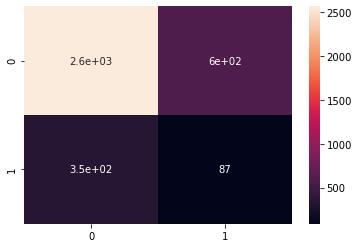

In [35]:
sns.heatmap(cm, annot=True)

In [36]:
#make a df that displays the cofficients indexed by feature name
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance.coef.nlargest(10)

marketing_drip                        0.051848
creation_source_ORG_INVITE            0.030980
creation_source_SIGNUP                0.029658
invited_by_user                       0.028327
creation_source_SIGNUP_GOOGLE_AUTH    0.025582
creation_source_PERSONAL_PROJECTS     0.024794
creation_source_GUEST_INVITE          0.023936
org_id_4                              0.006351
org_id_1                              0.005803
org_id_11                             0.005072
Name: coef, dtype: float64

In [37]:
feature_importance.head()

,coef
marketing_drip,0.051848
invited_by_user,0.028327
creation_source_GUEST_INVITE,0.023936
creation_source_ORG_INVITE,0.030980
creation_source_PERSONAL_PROJECTS,0.024794


All is not lost, however. The Random Forest Classifier has a number of hyperparameters that can be tuned to improve performance. Let's tune some of them to see if it improves the model's accuracy rate on the adopted users:

In [38]:
# tune some of the hyperparameters with gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

rfc = RandomForestClassifier(random_state=6)
param_grid = {
    'criterion': ["gini", "entropy"],
    'n_estimators': [50, 100, 300], 
    'max_depth': [1, 5, 10], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
grid = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rfc = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.8797222222222222


In [39]:
grid.best_score_

0.8795238095238096

In [40]:
grid.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=50, random_state=6)

It looks like tuning some of the hyperparameters improved the model's overall accuracy. Let's use the classifier with the tuned hyperparameter values on the training and test sets and see if that enables the classifier to identify more adopted users accurately:

## Tuned Model Performance

In [41]:
# train the model and make predictions on the training and test sets
from sklearn.ensemble import RandomForestClassifier
rfc_tuned = RandomForestClassifier(n_estimators=50, max_depth=1, random_state=6)
rfc_tuned.fit(X_train, y_train)
y_pred_rfc_tuned = rfc_tuned.predict(X_test)

print('Accuracy on training set = {}'.format(rfc_tuned.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(rfc_tuned.score(X_test, y_test)))

Accuracy on training set = 0.8795238095238095
Accuracy on test set = 0.8797222222222222


In [42]:
# generate classification report of model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc_tuned))

              precision    recall  f1-score   support

       False       0.88      1.00      0.94      3167
        True       0.00      0.00      0.00       433

    accuracy                           0.88      3600
   macro avg       0.44      0.50      0.47      3600
weighted avg       0.77      0.88      0.82      3600



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# generate confusion matrix for model performance
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc_tuned))

[[3167    0]
 [ 433    0]]


In [44]:
#make a df that displays the cofficients indexed by feature name
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance.coef.nlargest(10)

marketing_drip                        0.051848
creation_source_ORG_INVITE            0.030980
creation_source_SIGNUP                0.029658
invited_by_user                       0.028327
creation_source_SIGNUP_GOOGLE_AUTH    0.025582
creation_source_PERSONAL_PROJECTS     0.024794
creation_source_GUEST_INVITE          0.023936
org_id_4                              0.006351
org_id_1                              0.005803
org_id_11                             0.005072
Name: coef, dtype: float64

In [45]:
feature_importance.head()

,coef
marketing_drip,0.051848
invited_by_user,0.028327
creation_source_GUEST_INVITE,0.023936
creation_source_ORG_INVITE,0.030980
creation_source_PERSONAL_PROJECTS,0.024794


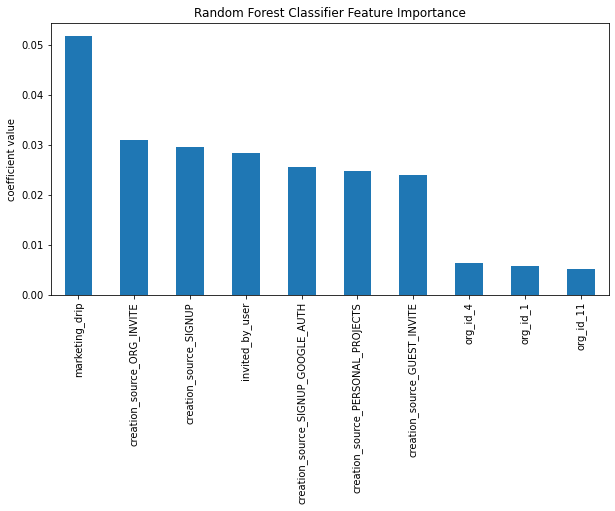

In [46]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()

# Conclusions

With little optimization this model can predict an active user with 88% accuracy. With that in mind, it appears that the most important features for making this prediction are the **"marketing_drip"**, **"creation_source_ORG_INVITE"** and **"creation_source_SIGNUP"**.